In [1]:
import neusim as ns

In [2]:
n=1 #number of couple of section Ranvier / myeline

In [3]:
ranvier_args = dict(
    L=30,#30 μm (
    a=10,#10μm 
    C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
    R_l=150, #(Migliore et al 2005) 150 Ω.cm
)

myeline_args = dict(
    L=1000,#1000 μm (
    a=10,#10 μm 
    C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
    R_l=150, #(Migliore et al 2005) 150 Ω.cm
)


In [4]:
N=ns.Neuron()

## Creation des sections

In [5]:

for i in range(n):
    N.add_section(ns.Section(**ranvier_args,name='ranvier_{}'.format(i)),2*i,2*i+1)
    N.add_section(ns.Section(**myeline_args,name='myeline_{}'.format(i)),2*i+1,2*i+2)
        

## Ajout des canaux

In [6]:
for i in range(n-1):
    N.sections[2*i]['obj'].add_channel_c(ns.channels.Hodgkin_Huxley())
    N.sections[2*i]['obj'].add_channel_c(ns.channels.LeakChannel(0,28))# kΩ.cm2 (Migliore et al 2005) 28 kΩ.cm2
    N.sections[2*i]['obj'].add_channel_c(ns.channels.LeakChannel(0,2))# kΩ.cm2 (Migliore et al 2005) 28 kΩ.cm2

## Ajout stimuli

In [7]:
N.sections[0]['obj'].add_channel_p(ns.channels.HeavysideCurrent(1000,0,2),x = 0)

In [202]:
?ns.channels.HeavysideCurrent

## Simulation

In [8]:
sim=ns.Simulation(N,10)

In [9]:
import numpy as np

In [188]:
T = np.linspace(0,100,101) #ms

In [177]:
sim.N

Neuron(sections=[{'i': 0, 'j': 1, 'obj': Section(name=ranvier_0, L=30 um, a=10 um, C_m=10 fF/μm², R_l=1.5 MΩ.μm), 'num': 0, 'idV': array([0, 1]), 'idS': array([], dtype=int64)}, {'i': 1, 'j': 2, 'obj': Section(name=myeline_0, L=1 mm, a=10 um, C_m=10 fF/μm², R_l=1.5 MΩ.μm), 'num': 1, 'idV': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100]), 'idS': array([], dtype=int64)}])

In [10]:
sim.run((0,100))

/home/guerrier/Documents/Travail/Document UBC/neuSim/neusim/core/simulation.py:70: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "ode_function" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at /home/guerrier/Documents/Travail/Document UBC/neuSim/neusim/core/simulation.py (98)

File "neusim/core/simulation.py", line 98:
    def ode_function(y,t,idV,idS,Cm,G,k_c,neuron):
        <source elided>

        V = y[idV]
        ^

  @jit
/home/guerrier/.local/lib/python3.6/site-packages/numba/compiler.py:725: NumbaWarning: Function "ode_function" was compiled in object mode without forceobj=True.

File "neusim/core/simulation.py", line 71:
    @jit
    def ode_function(y,t,idV,idS,Cm,G,k_c,neuron):
    ^

  self.func_ir.loc))
/home/guerrier/.local/lib/python3.6/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation pa

/home/guerrier/.local/lib/python3.6/site-packages/numba/compiler.py:725: NumbaWarning: Function "I" was compiled in object mode without forceobj=True.

File "neusim/core/model.py", line 171:
    def I(self,V,S,t):
        <source elided>
        #point channels
        for c in self.channels_p:
        ^

  self.func_ir.loc))
/home/guerrier/.local/lib/python3.6/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "neusim/core/model.py", line 171:
    def I(self,V,S,t):
        <source elided>
        #point channels
        for c in self.channels_p:
        ^

  warnings.warn(errors.NumbaDeprecationWarning(msg, self.func_ir.loc))
/home/guerrier/Documents/Travail/Document UBC/neuSim/neusi

/home/guerrier/.local/lib/python3.6/site-packages/numba/compiler.py:725: NumbaWarning: Function "dS" was compiled in object mode without forceobj=True.

File "neusim/core/model.py", line 180:
    def dS(self,V,S):
        <source elided>
        dS = np.zeros(S.shape)
        for channels in (self.channels_c,self.channels_p):
        ^

  self.func_ir.loc))
/home/guerrier/.local/lib/python3.6/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "neusim/core/model.py", line 180:
    def dS(self,V,S):
        <source elided>
        dS = np.zeros(S.shape)
        for channels in (self.channels_c,self.channels_p):
        ^

  warnings.warn(errors.NumbaDeprecationWarning(msg, self.func_ir.l

KeyboardInterrupt: 

In [20]:
from matplotlib import pyplot as plt

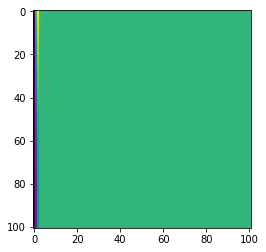

In [205]:
plt.imshow(sim.V.T)

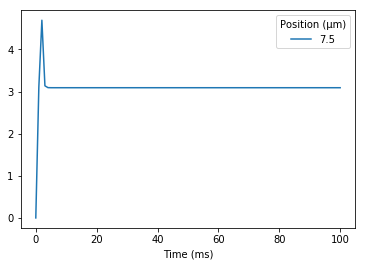

In [207]:
sim.V[0].loc[:,0::10].plot()